In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dirty_diabetes_data.csv')
df

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,Male,A,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,Male,A,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,Female,B,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,Male,A,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,Male,AB,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...,...,...
763,Male,NaN,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,Mile,NaN,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,Male,NaN,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,Male,NaN,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0


<br><br><font color=red size=7><sup>---------------------------------------------------------------------------------</sup></font>

<br><b><font color=red size=7>Replacing wrong values</font></b>

In [3]:
df.gender.value_counts()

Male      518
Female    189
Make       23
female     23
Mile        3
Femali      2
mal         1
Femal       1
Name: gender, dtype: int64

In [4]:
for i in df.index:
    
    if (df.iloc[i].gender=="Make") or (df.iloc[i].gender=="Mile") or (df.iloc[i].gender=="mal"):
        df.iloc[i, 0] = 'Male'
        
    elif (df.iloc[i].gender=="female") or (df.iloc[i].gender=="Femali") or (df.iloc[i].gender=="Femal"):
        df.iloc[i, 0] = 'Female'


In [5]:
df.gender.value_counts()

Male      545
Female    215
Name: gender, dtype: int64

In [6]:
df.blood_type.value_counts()

A     382
B     168
O     135
AB     55
p       2
a       2
Ap      1
P       1
AA      1
Name: blood_type, dtype: int64

In [7]:
for i in df.index:
    
    if (df.iloc[i].blood_type=="a") or (df.iloc[i].blood_type=="AA"):
        df.iloc[i, 1] = 'A'
        
    elif (df.iloc[i].blood_type=="p") or (df.iloc[i].blood_type=="P"):
        df.iloc[i, 1] = 'B'
   
    elif (df.iloc[i].blood_type=="Ap"):
        df.iloc[i, 1] = 'AB'


In [8]:
df.blood_type.value_counts()

A     385
B     171
O     135
AB     56
Name: blood_type, dtype: int64

<font color=red size=7><sup>---------------------------------------------------------------------------------</sup></font>

<br><br><b><font color=red size=7>Cheaking for duplicates</font></b>

In [9]:
df.duplicated().any().sum()

0

<font color=red size=7><sup>---------------------------------------------------------------------------------</sup></font>

<br><br><b><font color=red size=7>Cheaking for outliers</font></b>

array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'diastolic'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'dpf'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

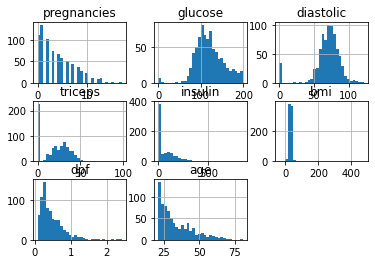

In [10]:
df.hist(bins=30)

<AxesSubplot:>

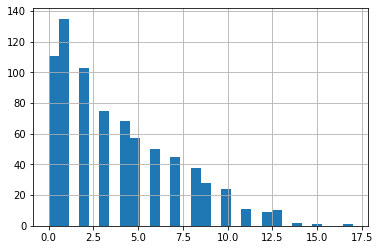

In [11]:
df.pregnancies.hist(bins=30)

<AxesSubplot:>

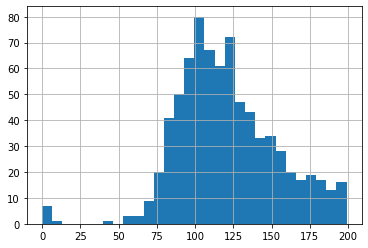

In [12]:
df.glucose.hist(bins=30)

<AxesSubplot:>

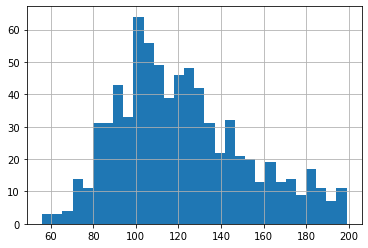

In [13]:
df = df[df.glucose>50]
df.glucose.hist(bins=30)

<AxesSubplot:>

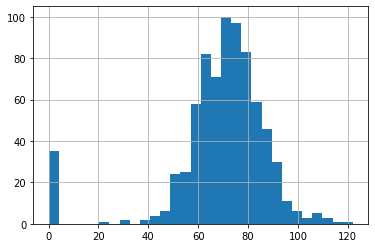

In [14]:
df.diastolic.hist(bins=30)

<AxesSubplot:>

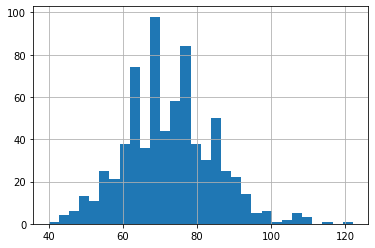

In [15]:
df = df[df.diastolic>38]
df.diastolic.hist(bins=30)

<AxesSubplot:>

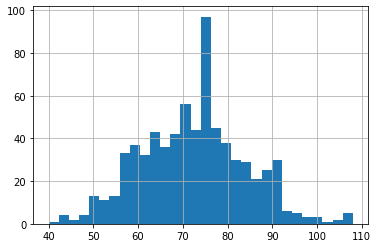

In [16]:
df = df[df.diastolic<110]
df.diastolic.hist(bins=30)

<AxesSubplot:>

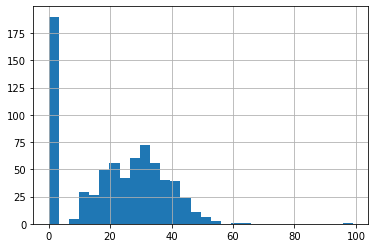

In [17]:
df.triceps.hist(bins=30)

<AxesSubplot:>

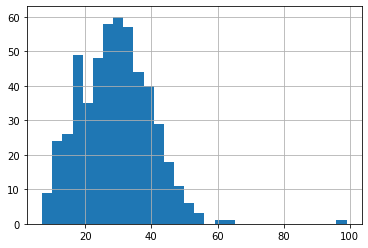

In [18]:
df = df[df.triceps>0]
df.triceps.hist(bins=30)

<AxesSubplot:>

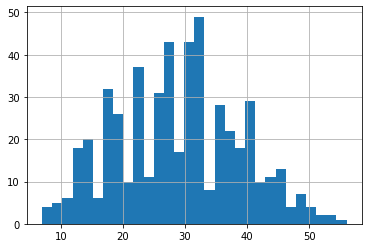

In [19]:
df = df[df.triceps<60]
df.triceps.hist(bins=30)

<AxesSubplot:>

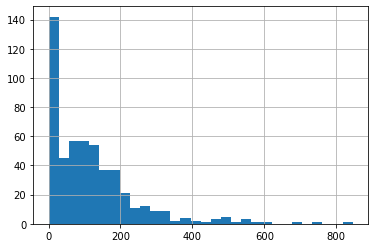

In [20]:
df.insulin.hist(bins=30)

<AxesSubplot:>

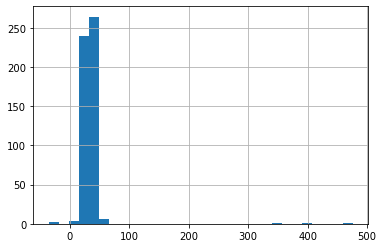

In [21]:
df.bmi.hist(bins=30)

In [22]:
df.sort_values(by="bmi")

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
281,Male,A,10,129.0,76.0,28.0,122.0,-35.9,0.280,39.0
296,Male,B,2,146.0,70.0,38.0,360.0,-28.0,0.337,29.0
371,Male,O,0,118.0,64.0,23.0,89.0,0.0,1.731,21.0
145,Female,O,0,102.0,75.0,23.0,0.0,0.0,0.572,21.0
321,Male,A,3,112.0,74.0,30.0,0.0,1.0,0.197,25.0
...,...,...,...,...,...,...,...,...,...,...
120,Male,A,0,162.0,76.0,56.0,100.0,53.2,0.759,25.0
673,Male,A,3,123.0,100.0,35.0,240.0,57.3,0.880,22.0
381,Male,A,0,105.0,68.0,22.0,0.0,344.0,0.236,22.0
452,Male,B,0,91.0,68.0,32.0,210.0,399.0,0.381,25.0


<AxesSubplot:>

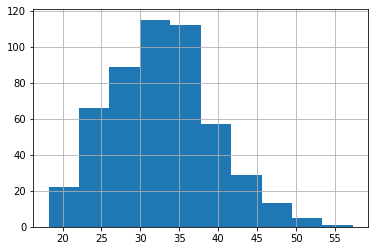

In [23]:
df = df[df.bmi>18]
df = df[df.bmi<60]
df.bmi.hist()

<AxesSubplot:>

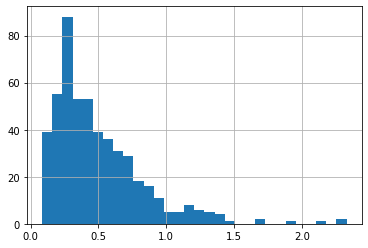

In [24]:
df.dpf.hist(bins=30)

<AxesSubplot:>

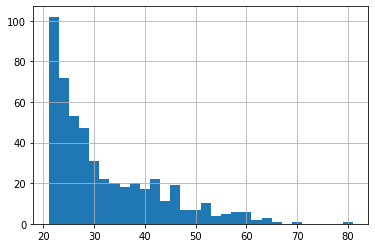

In [25]:
df.age.hist(bins=30)

<font color=red size=7><sup>---------------------------------------------------------------------------------</sup></font>

<br><br><b><font color=red size=7>Filling missing values</font></b>

In [27]:
df.isnull().any()

gender          True
blood_type      True
pregnancies    False
glucose        False
diastolic      False
triceps        False
insulin        False
bmi            False
dpf             True
age             True
dtype: bool

In [28]:
df.gender.value_counts()

Male      358
Female    144
Name: gender, dtype: int64

In [29]:
df.gender = df.gender.fillna('Male')

In [30]:
df.gender.isnull().any()

False

In [31]:
df.blood_type.value_counts()

A     255
B     112
O      88
AB     39
Name: blood_type, dtype: int64

In [32]:
df.blood_type = df.blood_type.fillna('A')

In [33]:
df.blood_type.isnull().any()

False

In [34]:
df.glucose = df.glucose.fillna(df.glucose.mean())  
df.dpf = df.dpf.fillna(df.glucose.mean())  
df.age = df.age.fillna(df.age.mean())  

In [35]:
df.isnull().any()

gender         False
blood_type     False
pregnancies    False
glucose        False
diastolic      False
triceps        False
insulin        False
bmi            False
dpf            False
age            False
dtype: bool

<font color=red size=7><sup>---------------------------------------------------------------------------------</sup></font>

<br><br><b><font color=red size=6>Saving the clean DataFrame into new CSV file</font></b>

In [36]:
df.to_csv("clean_diabetes_data.csv")